In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.isnull().values.any()

False

In [4]:
## here column ID, Gender and Age is significant for grouping the customers as spending score depends only on income.
# so we can ignore thaose columns

x=dataset.iloc[0:, 3:5]
x=x.values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

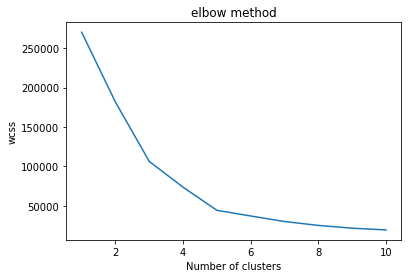

In [5]:
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,11):
    kmeans_x=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_x.fit(x)
    wcss.append(kmeans_x.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [6]:
# as we can see that the elbow cuts sharply at 5 so the number of cluster we consider is 3.

kmeans_x=KMeans(n_clusters=5, init='k-means++', random_state=42)
model=kmeans_x.fit_predict(x)
model

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

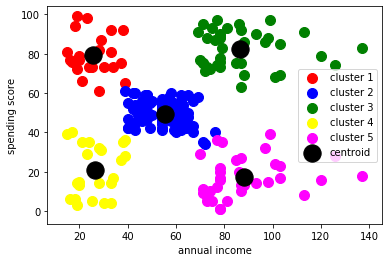

In [7]:
# we can view the clusters obtained using scatter plot.

plt.scatter(x[model==0,0], x[model==0,1], s=100, c='red', label='cluster 1')
plt.scatter(x[model==1,0], x[model==1,1], s=100, c='blue', label='cluster 2')
plt.scatter(x[model==2,0], x[model==2,1], s=100, c='green', label='cluster 3')
plt.scatter(x[model==3,0], x[model==3,1], s=100, c='yellow', label='cluster 4')
plt.scatter(x[model==4,0], x[model==4,1], s=100, c='magenta', label='cluster 5')


plt.scatter(kmeans_x.cluster_centers_[0:,0], kmeans_x.cluster_centers_[0:,1], s=300, c='black', label='centroid')


plt.title('')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

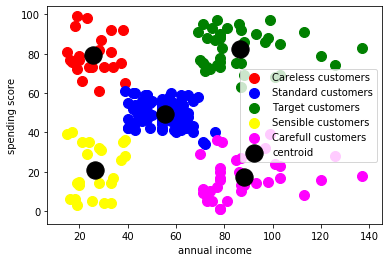

In [8]:
## from the above we can easily interperate the result as below,


# people with less income and spending less are 'sensible customers' "yellow color"       --- cluster-4
# people with less income and spending high are 'careless customers' "red color"          --- clsuter-1
# people with high income and spending less are 'carefull customers' "magenta color"      --- clsuter-5
# people with high income and spending high are 'target customers' "green color"          --- cluster-3
# people with moderate income and spending moderate are 'standard customers' "blue color" --- cluster-2



plt.scatter(x[model==0,0], x[model==0,1], s=100, c='red', label='Careless customers')
plt.scatter(x[model==1,0], x[model==1,1], s=100, c='blue', label='Standard customers')
plt.scatter(x[model==2,0], x[model==2,1], s=100, c='green', label='Target customers')
plt.scatter(x[model==3,0], x[model==3,1], s=100, c='yellow', label='Sensible customers')
plt.scatter(x[model==4,0], x[model==4,1], s=100, c='magenta', label='Carefull customers')


plt.scatter(kmeans_x.cluster_centers_[0:,0], kmeans_x.cluster_centers_[0:,1], s=300, c='black', label='centroid')


plt.title('')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()


